# MOF ChemUnity Property Extraction

This notebook demonstrates how the property extraction in MOF ChemUnity is used. You need to have the MOF name that you want to extract properties for which is obtained from the Matching workflow.

In [7]:
from src.MOF_ChemUnity.Agents.ExtractionAgent import ExtractionAgent
from src.MOF_ChemUnity.utils.DataPrep import Data_Prep
from src.MOF_ChemUnity.Extraction_Prompts import VERIFICATION, RECHECK, EXTRACTION
from src.MOF_ChemUnity.Water_Stability_Prompts import WATER_STABILITY, RULES_WATER_STABILITY, VERF_RULES_WATER_STABILITY, WATER_STABILITY_RE

### Preparation of MOF Names from Matching CSV

we need to read the matching csv file and extract the file names from within that.

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

plt.rcParams['svg.fonttype'] = 'none'

In [79]:
mof_names_df = pd.read_csv("./tests/water_stability_benchmark/case-study-3-ground-truth.csv")
mof_names_df.head()

,Reference,DOI,MOF contained,True Water Stability,Justification Sentence,Unnamed: 5
0,1,10.1038/s41586-019-1798-7,Al-PMOF/m8o66,Stable,The capture capacity of Al-PMOF for a mixture ...,NaN
1,1,10.1038/s41586-019-1798-7,Al-PyrMOF/m8o67,Stable,The capture capacity of Al-PyrMOF for a mixtur...,NaN
2,1,10.1038/s41586-019-1798-7,UiO-66-NH2,Not provided,Not provided,NaN
3,1,10.1038/s41586-019-1798-7,m8o71,Unstable,"Conversely, m8o71 completely loses its CO2 cap...",NaN
4,2,10.1039/c0dt00999g,[Zn4(dmf)(ur)2(ndc)4],Stable,The high stability of the guest-free metal–org...,NaN


### Markdown files setup

In [80]:
input_folder = "/home/amro/Chain_Eunomia/Chain_Eunomia/data/eunomia_case_3_md/"


files = glob.glob(input_folder+"/*/*.md")

In [81]:
mof_names_df["File"] = [input_folder+f"/{i}/{i}.md" for i in list(mof_names_df["Reference"])]
mof_names_df.head()

,Reference,DOI,MOF contained,True Water Stability,Justification Sentence,Unnamed: 5,File
0,1,10.1038/s41586-019-1798-7,Al-PMOF/m8o66,Stable,The capture capacity of Al-PMOF for a mixture ...,NaN,/home/amro/Chain_Eunomia/Chain_Eunomia/data/eu...
1,1,10.1038/s41586-019-1798-7,Al-PyrMOF/m8o67,Stable,The capture capacity of Al-PyrMOF for a mixtur...,NaN,/home/amro/Chain_Eunomia/Chain_Eunomia/data/eu...
2,1,10.1038/s41586-019-1798-7,UiO-66-NH2,Not provided,Not provided,NaN,/home/amro/Chain_Eunomia/Chain_Eunomia/data/eu...
3,1,10.1038/s41586-019-1798-7,m8o71,Unstable,"Conversely, m8o71 completely loses its CO2 cap...",NaN,/home/amro/Chain_Eunomia/Chain_Eunomia/data/eu...
4,2,10.1039/c0dt00999g,[Zn4(dmf)(ur)2(ndc)4],Stable,The high stability of the guest-free metal–org...,NaN,/home/amro/Chain_Eunomia/Chain_Eunomia/data/eu...


### Running the Extraction Loop for General Property Extraction + CoV

In [82]:
with open(".apikey", 'r') as f:
    os.environ["OPENAI_API_KEY"] = f.read()

from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o", temperature=0.1)
parser_llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)

In [89]:
result = {}
result["MOF Name"] = []
result["Ref Code"] = []
result["Property"] = []
result["Value"] = []
result["Units"] = []
result["Condition"] = []
result["Summary"] = []
result["Reference"] = []

In [90]:
filtered_result = {}
filtered_result["MOF Name"] = []
filtered_result["Ref Code"] = []
filtered_result["Property"] = []
filtered_result["Value"] = []
filtered_result["Units"] = []
filtered_result["Condition"] = []
filtered_result["Summary"] = []
filtered_result["Reference"] = []

In [91]:
ws_result = {}
ws_result["MOF Name"] = []
ws_result["Ref Code"] = []
ws_result["Property"] = []
ws_result["Value"] = []
ws_result["Units"] = []
ws_result["Condition"] = []
ws_result["Summary"] = []
ws_result["Reference"] = []

In [92]:
WS_READ = WATER_STABILITY.replace("{RULES}", RULES_WATER_STABILITY)
WS_CHECK = VERIFICATION.replace("{VERF_RULES}", VERF_RULES_WATER_STABILITY)
WS_RECHECK = RECHECK.replace("{RECHECK_INSTRUCTIONS}", WATER_STABILITY_RE.replace("{RULES}", RULES_WATER_STABILITY))

sp_dict = {"read_prompts": [WS_READ], "verification_prompts": [WS_CHECK], "recheck_prompts": [WS_RECHECK]}

In [93]:
from src.MOF_ChemUnity.utils.DocProcessor import DocProcessor

agent = ExtractionAgent(llm=llm)

In [94]:
for i in range(len(mof_names_df)):

    mof = mof_names_df.iloc[i]["MOF contained"].replace("{", "[").replace("}", "]")
    refcode = "HELLOW"
    reference = mof_names_df.iloc[i]["DOI"]
    
    _, response = agent.agent_response(mof, mof_names_df.iloc[i]["File"],
                                    EXTRACTION, ["Water Stability"], sp_dict, CoV=True, skip_general=True, fuzz_threshold=85, store_vs=True)
    
    # general_extraction = response

    # filtered = general_extraction[0]
    # all_props = general_extraction[1]

    # print(filtered)
    # print(all_props)

    # for j in filtered:
    #     filtered_result["MOF Name"].append(mof)
    #     filtered_result["Ref Code"].append(refcode)
    #     filtered_result["Reference"].append(reference)
    #     filtered_result["Property"].append(j.name)
    #     filtered_result["Units"].append(j.units)
    #     filtered_result["Value"].append(j.value)
    #     filtered_result["Condition"].append(j.condition)
    #     filtered_result["Summary"].append(j.summary)
    # for j in all_props.properties:
    #     result["MOF Name"].append(mof)
    #     result["Ref Code"].append(refcode)
    #     result["Reference"].append(reference)
    #     result["Property"].append(j.name)
    #     result["Units"].append(j.units)
    #     result["Value"].append(j.value)
    #     result["Condition"].append(j.condition)
    #     result["Summary"].append(j.summary)
    
    specific_extraction = response

    ws = specific_extraction[0]

    for j in ws:
        ws_result["MOF Name"].append(mof)
        ws_result["Ref Code"].append(refcode)
        ws_result["Reference"].append(reference)
        ws_result["Property"].append(j.name)
        ws_result["Units"].append(j.units)
        ws_result["Value"].append(j.value)
        ws_result["Condition"].append(j.condition)
        ws_result["Summary"].append(j.summary)



# all_props = pd.DataFrame(result)
# filtered = pd.DataFrame(filtered_result)
ws = pd.DataFrame(ws_result)
    

Saved vector store for /home/amro/Chain_Eunomia/Chain_Eunomia/data/eunomia_case_3_md//1/1.md in /home/amro/Chain_Eunomia/Chain_Eunomia/data/eunomia_case_3_md/vs/1
Reading to find the Water Stability of Al-PMOF/m8o66 specifically
LLM Structured Output: 
Water Stability = StableN/A ; conditions:  ; Justification: 1. "Figure 3c, d shows no loss of crystallinity upon activation as well as upon exposure to different harsh conditions, including immersion in water for 7 days."
2. "Although our materials do not have the highest reported Intensity (a.u.) 2T (°) 2T (°) c a b 6.61 Å a 6.78 Å a b c d Fig. 3 | Structural representation and stability of [Al-PMOF] and [Al- PyrMOF]."

Verifying the extraction:
Saved vector store for /home/amro/Chain_Eunomia/Chain_Eunomia/data/eunomia_case_3_md//1/1.md in /home/amro/Chain_Eunomia/Chain_Eunomia/data/eunomia_case_3_md/vs/1
Reading to find the Water Stability of Al-PyrMOF/m8o67 specifically
LLM Structured Output: 
Water Stability = StableN/A ; conditions:

In [95]:
ws = pd.DataFrame(ws_result)

In [106]:
ws.to_csv("eunomia_edit5.csv")

## Performance Metrics

In [97]:
case_3 = pd.read_csv("./tests/water_stability_benchmark/case-study-3-ground-truth.csv")
case_3.head()

,Reference,DOI,MOF contained,True Water Stability,Justification Sentence,Unnamed: 5
0,1,10.1038/s41586-019-1798-7,Al-PMOF/m8o66,Stable,The capture capacity of Al-PMOF for a mixture ...,NaN
1,1,10.1038/s41586-019-1798-7,Al-PyrMOF/m8o67,Stable,The capture capacity of Al-PyrMOF for a mixtur...,NaN
2,1,10.1038/s41586-019-1798-7,UiO-66-NH2,Not provided,Not provided,NaN
3,1,10.1038/s41586-019-1798-7,m8o71,Unstable,"Conversely, m8o71 completely loses its CO2 cap...",NaN
4,2,10.1039/c0dt00999g,[Zn4(dmf)(ur)2(ndc)4],Stable,The high stability of the guest-free metal–org...,NaN


In [ ]:
ws = pd.read_csv("/mnt/c/Users/Amro/Desktop/ws_no_hallucination.csv")

In [ ]:
ws = pd.read_csv("/mnt/c/Users/Amro/Desktop/ws.csv")

In [3]:
results_df = pd.read_csv("./tests/water_stability_benchmark/ws_no_hallucination_slightly_bettter_prompt_hope_for_the_best.csv")
ws = results_df

In [5]:
ws24_benchmark = pd.read_csv("./ws24_benchmark_results.csv")

In [109]:
import numpy as np

matrix = np.zeros((3,3))

for i in range(len(ws)):
    y_index = 0
    x_index = 0

    llm = ws.iloc[i]["Value"].lower()


    if(case_3.iloc[i]["True Water Stability"].lower() == "unstable"): y_index = 0
    elif(case_3.iloc[i]["True Water Stability"].lower() == "stable"): y_index = 1 
    else: y_index = 2
    if(llm == "unstable"): x_index = 0
    elif(llm == "stable"): x_index = 1 
    else: x_index = 2

    if (y_index == 0 and x_index == 0):
        print("\n\n")
        print(ws.loc[i, "Summary"])

    matrix[y_index, x_index] += 1





Conversely, m8o71 completely loses its CO2 capacity at 60% relative humidity (Fig. 2b).



Compound 1 dissolved completely in pure water and in all solvent mixtures that included water. However, 1 was insoluble in EtOH as well as a DMF/EtOH mixture.



The unstable nature of 1 upon de-solvation prevents us from obtaining a porous framework for gas-storage applications. Even solvent exchanges by using different solvents like MeOH, EtOH, Me2CO or CH2Cl2, followed by mild activation, lead to complete breakdown of the framework. This behaviour leads us to postulate that Zn2+ions with d 10 electron configuration provide no ligand-field stabilization energy and presumably the vulnerability of framework 1 originates from the removal of the axial aqua ligand.



This material is soluble in water, slightly soluble in methanol, and insoluble in ethanol, acetone, N,N′-dimethylformamide (DMF), and dimethyl sulfoxide.



1. Initial experimental work showed that MOF-5 is unstable with respect to 

In [100]:
recall = np.zeros(3)
precision = np.zeros(3)
false_positives = np.zeros(3)
false_negatives = np.zeros(3)
true_positives = np.zeros(3)


for k in range(3):
    for i in range(3):
        if i != k:
            false_positives[k] += matrix[i, k]
            false_negatives[k] += matrix[k, i]

    true_positives[k] += matrix[k,k]
    precision[k] = matrix[k,k]/(matrix[k,k] + false_positives[k])
    recall[k] = matrix[k,k]/(matrix[k,k] + false_negatives[k])

micro_precision = np.sum(true_positives)/(np.sum(true_positives)+np.sum(false_positives))
micro_recall = np.sum(true_positives)/(np.sum(true_positives)+np.sum(false_negatives))


In [101]:
print("\t\t\tPred. Unstable\tPred. Stable\tNP\n\tTrue Unstable\t\t{0}\t{1}\t\t{2}\n\tTrue Stable\t\t{3}\t{4}\t\t{5}\n\tNP\t\t\t{6}\t{7}\t\t{8}".format(*matrix.flatten()))
print("Accuracy: {0:0.00%}\n".format(np.sum([matrix[i,i] for i in range(3)])/np.sum(matrix)))
print("Recalls: Unstable {0:0.00%}\t\tStable {1:0.00%}\t\tNot Provided {2:0.00%}".format(*recall.flatten()))
print("Precision: Unstable {0:0.00%}\t\tStable {1:0.00%}\t\tNot Provided {2:0.00%}".format(*precision.flatten()))

			Pred. Unstable	Pred. Stable	NP
	True Unstable		29.0	5.0		4.0
	True Stable		12.0	99.0		13.0
	NP			1.0	14.0		194.0
Accuracy: 87%

Recalls: Unstable 76%		Stable 80%		Not Provided 93%
Precision: Unstable 69%		Stable 84%		Not Provided 92%


In [102]:
print(matrix)

[[ 29.   5.   4.]
 [ 12.  99.  13.]
 [  1.  14. 194.]]


In [ ]:
incorrect.to_csv("./wrong_stuff.csv")

In [103]:
import matplotlib.pyplot as plt

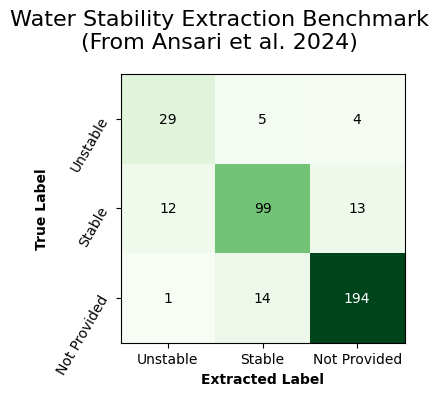

In [104]:
fig, ax = plt.subplots(figsize=(4,4))
ax.pcolormesh(matrix, cmap="Greens")
fig.suptitle("Water Stability Extraction Benchmark\n(From Ansari et al. 2024)", fontsize=16)
ax.set_xticks(ticks=np.arange(3)+0.5, labels=["Unstable", "Stable", "Not Provided"], fontsize=10)
ax.invert_yaxis()
ax.set_yticks(ticks=np.arange(3)+0.5, labels=["Unstable", "Stable", "Not Provided"], fontsize=10, rotation=60, )
ax.set_xlabel("Extracted Label", fontsize=10, fontweight="bold")
ax.set_ylabel("True Label", fontsize=10, fontweight="bold")

for j in range(3):
    for i in range(3):
        if i==j and i>1:
            ax.text(j+0.5, i+0.5, f"{matrix[i,j]:0n}", ha="center", va="center", color="white")
            continue
        ax.text(j+0.5, i+0.5, f"{matrix[i,j]:0n}", ha="center", va="center", color="black")

plt.tight_layout(rect=[0,0,1,1])

plt.savefig("/mnt/c/Users/Amro/Downloads/Water_Stability_Eunomia.svg")

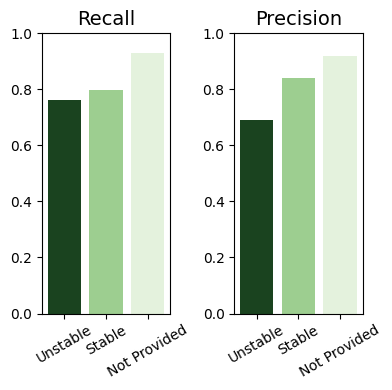

In [105]:
categories = ["Unstable", "Stable", "Not Provided"]
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(4,4))
ax1.set_title("Recall", fontsize=14)
ax1.bar(categories, recall, color=['#1a431f', "#9dce90", "#e4f2dd"])
ax1.set_ylim([0, 1])

ax1.set_xticks(categories)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30)


ax2.set_title("Precision", fontsize=14)
ax2.bar(categories, precision, color=['#1a431f', "#9dce90", "#e4f2dd"])
ax2.set_ylim([0, 1])

ax2.set_xticks(categories)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=30)

plt.tight_layout()
plt.savefig("/mnt/c/Users/Amro/Downloads/Water_Stability_Labels_Series.png")

# WS24 Comparison and Prompt Optimization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
mistakes_df = pd.read_csv("/mnt/c/Users/Amro/Downloads/WS24/ws24_mistakes.csv")
# mistakes_df = pd.read_csv("/mnt/c/Users/Amro/Downloads/vs_missing_labels/test_missing_labels.csv")
# mistakes_df = pd.read_csv("/mnt/c/Users/Amro/Downloads/ws24_prompts/ws24_prompt_engineering.csv")

In [3]:
mistakes_df.head(30)

,Unnamed: 0,refcode,DOI,Publisher,file name,MOF name
0,22,MAKGUD,10.1021/acs.cgd.6b00060,ACS,cg6b00060.zip,[Tb­(HL3)­(H2O)3]·1.5H2O<|>complex 13
1,23,MAKHAK,10.1021/acs.cgd.6b00060,ACS,cg6b00060.zip,[Dy­(HL3)­(H2O)3]·1.5H2O<|>complex 14
2,29,VIDWIQ,10.1021/cg301405r,ACS,cg301405r.zip,[Mg2DBIP(H2O)4(μ2-H2O)]·6H2O<|>compound 1
3,31,IVEQEG,10.1021/cm052149l,ACS,cm052149l.zip,MIL-91(Al)<|>AlOH(H2L)·nH2O
4,33,EZOFUV,10.1021/ic200381f,ACS,ic200381f.zip,[Ni2(BDC)2(DABCO)]·(DMF)4(H2O)1.5<|>3a
5,35,FORWAL,10.1021/ic800356v,ACS,ic800356v.zip,Na[Fe(C7H11O6)3]·(OH)·8H2O<|>compound 3
6,50,VAGMAT,10.1002/chem.201001549,Wiley,na,{[Zn2(TCPBDA)(H2O)2]·30DMF·6H2O}n<|>SNU-30
7,51,UBIPAY,10.1002/chem.201101321,Wiley,na,[Mn2L'(H2O)2]·3H2O<|>compound 2
8,54,WASPAI,10.1002/ejic.200400960,Wiley,na,[CuL(L1)]·2H2O<|>compound 1
9,58,BUCVIG,10.1002/ejic.201500069,Wiley,na,"[Co2(tipm)(1,3-BDC)2]·0.5CH3CN<|>Compound 2<|>..."


In [4]:
base_folder = "/mnt/c/Users/Amro/Downloads/WS24/vs/"
# base_folder = "/mnt/c/Users/Amro/Downloads/vs_missing_labels/vs_missing_labels/" 
# base_folder = "/mnt/c/Users/Amro/Downloads/ws24_prompts/vs/" 

## Prompt Information

In [5]:
from src.MOF_ChemUnity.Extraction_Prompts import VERIFICATION, RECHECK, EXTRACTION

### Original

In [38]:
from src.MOF_ChemUnity.Water_Stability_Prompts import WATER_STABILITY, RULES_WATER_STABILITY, VERF_RULES_WATER_STABILITY, WATER_STABILITY_RE

### Edit 1

Slight changes to the Verification prompt to match the current workflow better!

Includes changes to the parent "Verification" Prompt!

In [6]:
RULES_WATER_STABILITY = """
There are only 2 options for water stability (Stable, Unstable):
1. Stable:  -No change in properties after exposure to moisture or steam, soaking or boiling in water or an aqueous solution.
            -Retaining its porous structure in solution. 
            -No loss of crystallinity.
            -Insoluble in water or an aqueous solution.
            -Water adsorption isotherm should have a steep uptake.
            -Good cycling performance.

2. Unstable:
            -The MOF will decompose or change properties or has a change in its crystal structure after exposure/soak to a humid environment, steam or if it partially dissolves in water.
            -Soluble or patrially soluble in water or an aqueous solution.


3. Not provided:    -If you don't know or cannot justfy 1 or 2. Any thermal analysis is not water stability.
                    -Any mention of TGA or TG or temperature is not considered water stability even if water molecules are involved
                    -Organic solvents or solutions with other water and other chemicals do not provide water stability label
"""

VERF_RULES_WATER_STABILITY = """Check on steep uptakes, solubility in water, change in properties after being exposed to water/steam, change in crystallinity, or mention of water stability in the sentence.
Now, is the justification for the previous extracted label valid?

Do not make up answers.
Do not consider chemical or thermal stability (including TGA or any testing under varying temperatures) or stability in air as a valid reason."""

WATER_STABILITY = """You are an expert chemist. In the document find the Water Stability of the MOF with the following Names and Coreferences: {MOF_name}. 
Use the following rules to determine its water stability:
{RULES}

DO NOT HALLUCINATE!
Your final answer should contain the following:
    1. The water stability of the MOF. 
    2. The exact sentences without any changes from the document that justifies your decision. Try to find more than once sentence. This should be "Not provided" if you cannot find water stability.
"""

WATER_STABILITY_RE = """This time, you must find a different justification and/or label for the water stability. Or say "Not provided" as outline by the rules below.
Use the following rules to determine its water stability:
{RULES}

Please do not hallucinate. You are not allowed to output the exact same thing as the input!
Your final answer should contain the following:
    1. The water stability of the MOF.
    2. The exact sentences without any changes from the document that justifies your decision. Try to find more than once sentence.
"""

### Edit 2

Small change to the recheck prompt to make it either change the label to fit the justfication or find a better justification

Small change to the rules of water stability saying there are only 2 options for it so it stops outputting "Not provided" or "Insoluble" recklessly

In [ ]:
RULES_WATER_STABILITY = """
There are only 2 options for water stability (Stable, Unstable):
1. Stable:  -No change in properties after exposure to moisture or steam, soaking or boiling in water or an aqueous solution.
            -Retaining its porous structure in solution. 
            -No loss of crystallinity.
            -Insoluble in water or an aqueous solution.
            -Water adsorption isotherm should have a steep uptake.
            -Good cycling performance.

2. Unstable:
            -The MOF will decompose or change properties or has a change in its crystal structure after exposure/soak to a humid environment, steam or if it partially dissolves in water.
            -Soluble or patrially soluble in water or an aqueous solution.


3. Not provided:    -If you don't know or cannot justfy 1 or 2. Any thermal analysis is not water stability.
                    -Any mention of TGA or TG or temperature is not considered water stability even if water molecules are involved
                    -Organic solvents or solutions with other water and other chemicals do not provide water stability label
"""

VERF_RULES_WATER_STABILITY = """Check on steep uptakes, solubility in water, change in properties after being exposed to water/steam, change in crystallinity, or mention of water stability in the sentence.
Now, is the justification for the previous extracted label valid?

Do not make up answers.
Do not consider chemical or thermal stability (including TGA or any testing under varying temperatures) or stability in air as a valid reason."""

WATER_STABILITY = """You are an expert chemist. In the document find the Water Stability of the MOF with the following Names and Coreferences: {MOF_name}. 
Use the following rules to determine its water stability:
{RULES}

DO NOT HALLUCINATE!
Your final answer should contain the following:
    1. The water stability of the MOF. 
    2. The exact sentences without any changes from the document that justifies your decision. Try to find more than once sentence. This should be "Not provided" if you cannot find water stability.
"""

WATER_STABILITY_RE = """This time, you must change the label or find a different VALID justification (Say "Not provided" if you cannot do either).
Use the following rules to determine its water stability using VALID justifications:
{RULES}

Please do not hallucinate. You need to change your previous output
Your final answer should contain the following:
    1. The water stability of the MOF.
    2. The exact sentences without any changes from the document that justifies your decision. Try to find more than once sentence.
"""

### Edit 3

Improved the formatting of many of the water stability rules to make them more concise and less repetitive

In [ ]:
RULES_WATER_STABILITY = """
There are only 2 options for water stability (Stable, Unstable):
1. Stable:  -retains properties/porous structure/crystallinity after exposure to water/steam/humidity.
            -Insoluble in water or an aqueous solution.
            -Water adsorption isotherm has a steep uptake.
            -Good cycling performance.

2. Unstable:
            -The MOF will decompose/change properties/change crystal structure after exposure to water/steam/humidity
            -Soluble or patrially soluble in water or an aqueous solution.


3. Not provided:    -No information provided for either label
                    -Any thermal analysis or thermal reactions are not water stability.
                    -In-Air Decomposition or Instability of crystal in air unless humidity is mentioned
                    -Any mention of TGA or TG or temperature is not considered water stability even if water molecules are involved
                    -Organic solvents or solutions with other chemicals do not provide water stability label
"""

VERF_RULES_WATER_STABILITY = """Check on steep uptakes, solubility in water, change in properties after being exposed to water/steam, change in crystallinity, or mention of water stability in the sentence.
Now, is the justification for the previous extracted label valid?

Do not make up answers.
Do not consider chemical or thermal stability (including TGA or any testing under varying temperatures) or stability in air as a valid reason."""

WATER_STABILITY = """You are an expert chemist. In the document find the Water Stability of the MOF with the following Names and Coreferences: {MOF_name}. 
Use the following rules to determine its water stability:
{RULES}

DO NOT HALLUCINATE!
Your final answer should contain the following:
    1. The water stability of the MOF. 
    2. The exact sentences without any changes from the document that justifies your decision. Try to find more than once sentence. This should be "Not provided" if you cannot find water stability.
"""

WATER_STABILITY_RE = """This time, you must change the label or find a different VALID justification (Say "Not provided" if you cannot do either).
Use the following rules to determine its water stability usin VALID justifications:
{RULES}

Please do not hallucinate. You need to change your previous output
Your final answer should contain the following:
    1. The water stability of the MOF.
    2. The exact sentences without any changes from the document that justifies your decision. Try to find more than once sentence.
"""

### Edit 4:

Minor changes to one of the rules

In [49]:
RULES_WATER_STABILITY = """
There are only 2 options for water stability (Stable, Unstable):
1. Stable:  -retains properties/porous structure/crystallinity after exposure to water/steam/humidity.
            -Insoluble in water or an aqueous solution.
            -Water adsorption isotherm has a steep uptake.
            -Good cycling performance.

2. Unstable:
            -The MOF will decompose/change properties/change crystal structure after exposure to water/steam/humidity
            -Soluble or patrially soluble in water or an aqueous solution.


3. Not provided:    -No information provided for either label
                    -Any thermal analysis or thermal reactions are not water stability.
                    -In-Air Decomposition or Instability of crystal unless humidity is mentioned
                    -Any mention of TGA or TG or temperature is not considered water stability even if water molecules are involved
                    -Information about the interaction with Organic solvents other than including water
"""

VERF_RULES_WATER_STABILITY = """Check on steep uptakes, solubility in water, change in properties after being exposed to water/steam, change in crystallinity, or mention of water stability in the sentence.
Now, is the justification for the previous extracted label valid?

Do not make up answers.
Do not consider chemical or thermal stability (including TGA or any testing under varying temperatures) or stability in air as a valid reason."""

WATER_STABILITY = """You are an expert chemist. In the document find the Water Stability of the MOF with the following Names and Coreferences: {MOF_name}. 
Use the following rules to determine its water stability:
{RULES}

DO NOT HALLUCINATE!
Your final answer should contain the following:
    1. The water stability of the MOF. 
    2. The exact sentences without any changes from the document that justifies your decision. Try to find more than once sentence. This should be "Not provided" if you cannot find water stability.
"""

WATER_STABILITY_RE = """This time, you must change the label or find a different VALID justification (Say "Not provided" if you cannot do either).
Use the following rules to determine its water stability usin VALID justifications:
{RULES}

Please do not hallucinate. You need to change your previous output
Your final answer should contain the following:
    1. The water stability of the MOF.
    2. The exact sentences without any changes from the document that justifies your decision. Try to find more than once sentence.
"""

### Edit 5:

Added few-shot examples to the water stability read prompt and recheck prompt

In [77]:
RULES_WATER_STABILITY = """
There are only 2 options for water stability (Stable, Unstable):
1. Stable:  -retains properties/porous structure/crystallinity after exposure to water/steam/humidity.
            -Insoluble in water or an aqueous solution.
            -Water adsorption isotherm has a steep uptake.
            -Good cycling performance.

2. Unstable:
            -The MOF will decompose/change properties/change crystal structure after exposure to water/steam/humidity
            -Soluble or patrially soluble in water or an aqueous solution.

3. Not provided:    -No information provided for either label
                    -Any thermal analysis or thermal reactions are not water stability.
                    -In-Air Decomposition or Instability of crystal unless humidity is mentioned
                    -Any mention of TGA or TG or temperature is not considered water stability even if water molecules are involved
                    -Information about the interaction with Organic solvents other than including water
"""

VERF_RULES_WATER_STABILITY = """Check on steep uptakes, solubility in water, change in properties after being exposed to water/steam, change in crystallinity, or mention of water stability in the sentence.
Now, is the justification for the previous extracted label valid?

Do not make up answers.
Do not consider chemical or thermal stability (including TGA or any testing under varying temperatures) or stability in air as a valid reason."""

WATER_STABILITY = """You are an expert chemist. In the document find the Water Stability of the MOF with the following Names and Coreferences: {MOF_name}. 
Use the following rules to determine its water stability:
{RULES}

DO NOT HALLUCINATE!
Your final answer should contain the following:
    1. The water stability of the MOF. 
    2. The exact sentences without any changes from the document that justifies your decision. Try to find more than once sentence. This should be "Not provided" if you cannot find water stability.


Examples: -Documents: "The MOF is found to dissociate only in methanol but is otherwise insoluble in water which is due to highly polar ions or something"
          1.Correct Label:  "Stable"
          2.The MOF is found to dissociate only in methanol but is otherwise insoluble in water

          -Documents: "The MOF is insoluble in water and common organic solvents. It has a very unique shape and an interesting geometry..."
          1.Correct Label: "Stable"
          2.The MOF is insoluble in water and common organic solvents.

          -Documents: "This MOF is found to be insoluble in water. After immersion in water the PXRD showed a shift in the peaks. This indicates some changes to the crystals"
          1.Correct Label: "Unstable"
          2.After immersion in water the PXRD showed a shift in the peaks. This indicates some changes to the crystals

          -Documents: "To get the diffractions, the MOF was dissolved in organic solvents. The thermal analysis and TGA showed interesting isotherms for this MOF."
          1.Correct Label: "Not Provided"
          2.There is not mention of water, steam, or humidity any where in the documents. 
"""

WATER_STABILITY_RE = """This time, you must change the label or find a different VALID justification (Say "Not provided" if you cannot do either).
Use the following rules to determine its water stability usin VALID justifications:
{RULES}

Please do not hallucinate. You need to change your previous output
Your final answer should contain the following:
    1. The new water stability label of the MOF.
    2. The new exact sentences without any changes from the document that justifies your decision. Try to find more than once sentence.

Examples: -Documents: "There is no clear crystals obtain for this MOF when dissolved in DMF. The PXRD shows no diffraction to be noted and no peaks. The weight loss in TGA is mainly due to water molecules leaving the crystal. The MOF is found to be water insoluble"
          -Previous Output: Label -> Unstable, Justification -> The weight loss in TGA is mainly due to water molecules leaving the crystal.
          1.Correct Label: "Stable"
          2.The MOF is found to be water insoluble.

          -Documents: "The MOF retains its crystal structure when immersed in H2O, MeOH and EtOH. However, there is a clear change in color and crystallinity when dissolved in other organic solvents like DMSO or DMF."
          -Previous Output: Label -> Unstable, Justification -> The MOF retains its crystal structure when immersed in H2O, MeOH and EtOH.
          1.Correct Label: "Stable"
          2.The MOF retains its crystal structure when immersed in H2O, MeOH and EtOH.

          -Documents: "The MOF is thermally tested and we found that water molecules exit the structure first with weight loss of 1.9% which is later shown in the TGA analysis."
          -Previous Output: Label -> Unstable, Justification -> The MOF is thermally tested and we found that water molecules exit the structure first with weight loss of 1.9%
          1.Correct Label: "Not provided"
          2.There is no mention of stability of the MOF in water
"""

## Prompt setup

In [64]:
WS_READ = WATER_STABILITY.replace("{RULES}", RULES_WATER_STABILITY)
WS_CHECK = VERIFICATION.replace("{VERF_RULES}", VERF_RULES_WATER_STABILITY)
WS_RECHECK = RECHECK.replace("{RECHECK_INSTRUCTIONS}", WATER_STABILITY_RE.replace("{RULES}", RULES_WATER_STABILITY))

sp_dict = {"read_prompts": [WS_READ], "verification_prompts": [WS_CHECK], "recheck_prompts": [WS_RECHECK]}

## LLM Setup

In [65]:
from src.MOF_ChemUnity.Agents.ExtractionAgent import ExtractionAgent

In [66]:
with open(".apikey", 'r') as f:
    os.environ["OPENAI_API_KEY"] = f.read()

from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o", temperature=0.1, seed=898)
parser_llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)

In [67]:
from src.MOF_ChemUnity.utils.DocProcessor import DocProcessor

agent = ExtractionAgent(llm=llm)

## Prediction Loop Setup

In [68]:
ws_result = {}
ws_result["MOF Name"] = []
ws_result["Ref Code"] = []
ws_result["Property"] = []
ws_result["Value"] = []
ws_result["Units"] = []
ws_result["Condition"] = []
ws_result["Summary"] = []
ws_result["Reference"] = []

## Prediction Loop

In [69]:
from openai import RateLimitError

try:
    for i in range(len(mistakes_df)):

        mof = mistakes_df.loc[i, "MOF name"].replace("{", "[").replace("}", "]")
        refcode = mistakes_df.loc[i, "refcode"]
        print(refcode)
        reference = mistakes_df.loc[i, "DOI"]
        filename = mistakes_df.loc[i, "file name"].replace(".zip", ".tei")
        vs_folder = base_folder+(filename if filename!="na" else reference.replace("/", "_"))
        print(vs_folder)
        
        _, response = agent.agent_response(mof, "place holder.md",
                                        EXTRACTION, ["Water Stability"], sp_dict, CoV=True, skip_general=True,
                                        fuzz_threshold=85, store_vs=False, vector_store=vs_folder)
        
        specific_extraction = response

        ws = specific_extraction[0]

        for j in ws:
            ws_result["MOF Name"].append(mof)
            ws_result["Ref Code"].append(refcode)
            ws_result["Reference"].append(reference)
            ws_result["Property"].append(j.name)
            ws_result["Units"].append(j.units)
            ws_result["Value"].append(j.value)
            ws_result["Condition"].append(j.condition)
            ws_result["Summary"].append(j.summary)

    ws = pd.DataFrame(ws_result)

except RateLimitError as e:
    print(f"\nWe are at {i}")
    print(f"\n{e}")
    ws = pd.DataFrame(ws_result)

MAKGUD
/mnt/c/Users/Amro/Downloads/WS24/vs/cg6b00060.tei
Reading to find the Water Stability of [Tb­(HL3)­(H2O)3]·1.5H2O<|>complex 13 specifically
LLM Structured Output: 
Water Stability = StableN/A ; conditions:  ; Justification: The phase purities of complexes 1–5 and 10–15 were confirmed by powder X-ray diffraction patterns, as shown in Figure S3. Simultaneously, the stabilities of these complexes in the open air are also validated. Specifically, the prepared complexes 4 and 13 were exposed in open air, the medial humidity of which is 45% approximately, for 24 h, 48 h, 72 h, and 7 days, respectively. Then, the PXRD patterns were used to confirm the air stabilities (Figure). The results reveal that all complexes are stable when exposed in air containing water vapor, and they can keep their original skeletons completely in open air more than 7 days.

Verifying the extraction:

Reading the document again to find a different justification/label
LLM Structured Output from Rechecking: 
Wa

## Results

In [70]:
ws = pd.DataFrame(ws_result)

In [71]:
ws.head(6)

,MOF Name,Ref Code,Property,Value,Units,Condition,Summary,Reference
0,[Tb­(HL3)­(H2O)3]·1.5H2O<|>complex 13,MAKGUD,Water Stability,Stable,N/A,,The phase purities of complexes 1–5 and 10–15 ...,10.1021/acs.cgd.6b00060
1,[Dy­(HL3)­(H2O)3]·1.5H2O<|>complex 14,MAKHAK,Water Stability,Not provided,N/A,,There is no mention of stability of the MOF in...,10.1021/acs.cgd.6b00060
2,[Mg2DBIP(H2O)4(μ2-H2O)]·6H2O<|>compound 1,VIDWIQ,Water Stability,Not provided,N/A,,There is no mention of stability of the MOF in...,10.1021/cg301405r
3,MIL-91(Al)<|>AlOH(H2L)·nH2O,IVEQEG,Water Stability,Stable,N/A,,The thermal behavior of MIL-91(Al) shows a wei...,10.1021/cm052149l
4,[Ni2(BDC)2(DABCO)]·(DMF)4(H2O)1.5<|>3a,EZOFUV,Water Stability,Stable,N/A,,Compound 3a is also stable against moisture si...,10.1021/ic200381f
5,Na[Fe(C7H11O6)3]·(OH)·8H2O<|>compound 3,FORWAL,Water Stability,Stable,N/A,,The compounds were easily isolated in pure cry...,10.1021/ic800356v


In [72]:
for i in range(len(ws)):
    if ws.loc[i, "Value"].lower() == "not provided" or ws.loc[i, "Value"].lower() == "stable" or ws.loc[i, "Value"].lower() == "unstable":
        continue

    if "insoluble" in ws.loc[i, "Value"].lower():
        ws.loc[i, "Value"] = "Stable"
    else:
        ws.loc[i, "Value"] = "Unstable"

ws["Value"].unique()

array(['Stable', 'Not provided', 'Unstable', 'Not Provided'], dtype=object)

In [73]:
ws24_df = pd.read_csv("/mnt/c/Users/Amro/Downloads/labels.csv")
ws24_df["WS Stability"] = ws24_df["Burtch label (1=unstable; 2=low kinetic stability; 3=high kinetic stability; 4=thermodynamic stability)"].apply(lambda x: "stable" if x>2 else "unstable")

In [74]:
joined_ws_chemunity_df = ws24_df[["refcode", "WS Stability", "DOI"]].merge(ws.loc[ws["Value"]!="Not provided",["Ref Code", "Value", "Summary"]], how="inner", left_on="refcode", right_on="Ref Code")
joined_ws_chemunity_df = joined_ws_chemunity_df.rename({"Value": "ChemUnity Stability", "Summary": "ChemUnity Summary"}, axis=1)


In [75]:
joined_ws_chemunity_df.to_csv("lets_inspect.csv")

### Confusion Matrix

Percent Match b/w ChemUnity and WS24 Water Stability Labels: 56.00%


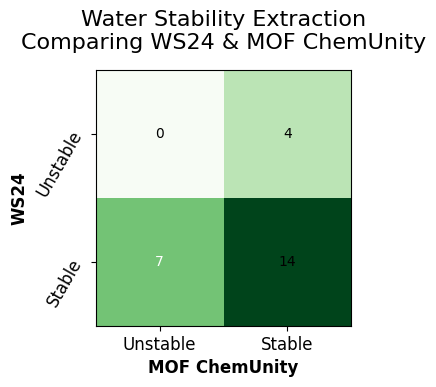

In [76]:
confusion_matrix = np.zeros((2,2))

wrong_codes = []
for i in range(len(joined_ws_chemunity_df)):
    chemunity = joined_ws_chemunity_df.loc[i, "ChemUnity Stability"]
        
    ws24 = joined_ws_chemunity_df.loc[i, "WS Stability"]

    if chemunity.lower() == "stable":
        chemunity_index = 1
    else:
        chemunity_index = 0
    
    if ws24.lower() == "stable":
        ws_index = 1
    else:
        ws_index = 0
    
    if ws_index != chemunity_index:
        wrong_codes.append(joined_ws_chemunity_df.loc[i, ["refcode", "DOI"]])
        

    confusion_matrix[ws_index, chemunity_index] += 1

# add previous results
if False:
    confusion_matrix[0,0] += 33
    confusion_matrix[1,1] += 79



print(f"Percent Match b/w ChemUnity and WS24 Water Stability Labels: {np.trace(confusion_matrix)/np.sum(confusion_matrix):0.2%}")

fig, ax = plt.subplots(figsize=(4,4))

ax.imshow(confusion_matrix, cmap="Greens")
ax.set_title("Water Stability Extraction\nComparing WS24 & MOF ChemUnity", fontsize=16, y=1.05)
ax.set_xticks(ticks=np.arange(2), labels=["Unstable", "Stable"], fontsize=12)
ax.set_yticks(ticks=np.arange(2), labels=["Unstable", "Stable"], fontsize=12, rotation=60)
ax.set_xlabel("MOF ChemUnity", fontsize=12, fontweight="bold")
ax.set_ylabel("WS24", fontsize=12, fontweight="bold")

for j in range(2):
    for i in range(2):
        if i == 1 and j == 0:
            ax.text(j, i, f"{confusion_matrix[i,j]:0n}", ha="center", va="center", color="white")
            continue
        ax.text(j, i, f"{confusion_matrix[i,j]:0n}", ha="center", va="center", color="black")

plt.tight_layout(rect=[0,0,1,1])